## Text Cloud


#### 목표 : 'mtcars' data에서 row이름 중 가장 많이 나온 단어는 무엇일까? 

#### 순서 : matrix -> VectorSource화 -> Corpus -> TDM문자추출

In [46]:
library(tm)

In [47]:
# raw named
vCarname <- rownames(mtcars)
vCarname

#t를 이용해 행과 열을 바꿈 - 역함수
(t(vCarname))

[1] "Mazda RX4"           "Mazda RX4 Wag"       "Datsun 710"         
 [4] "Hornet 4 Drive"      "Hornet Sportabout"   "Valiant"            
 [7] "Duster 360"          "Merc 240D"           "Merc 230"           
[10] "Merc 280"            "Merc 280C"           "Merc 450SE"         
[13] "Merc 450SL"          "Merc 450SLC"         "Cadillac Fleetwood" 
[16] "Lincoln Continental" "Chrysler Imperial"   "Fiat 128"           
[19] "Honda Civic"         "Toyota Corolla"      "Toyota Corona"      
[22] "Dodge Challenger"    "AMC Javelin"         "Camaro Z28"         
[25] "Pontiac Firebird"    "Fiat X1-9"           "Porsche 914-2"      
[28] "Lotus Europa"        "Ford Pantera L"      "Ferrari Dino"       
[31] "Maserati Bora"       "Volvo 142E"

Mazda RX4,Mazda RX4 Wag,Datsun 710,Hornet 4 Drive,Hornet Sportabout,Valiant,Duster 360,Merc 240D,Merc 230,Merc 280,⋯,AMC Javelin,Camaro Z28,Pontiac Firebird,Fiat X1-9,Porsche 914-2,Lotus Europa,Ford Pantera L,Ferrari Dino,Maserati Bora,Volvo 142E


##### vectosource화

텍스트 마이닝을 통해 데이터를 분석하려면 우선 원데이터가 텍스트 형태로 되어 있고 이를 말뭉치로 변환하여야 한다. 데이터가 벡터 형태(연설문 등) 혹은 데이터프레임 형태(트위터 트윗 등)에 따라 VectorSource(), DataframeSource() 함수를 적용하여 Source 객체로 변형을 시킨다. 그리고 나서 VCorpus() 함수를 활용하여 말뭉치(Corpus)로 저장한다. 휘발성 말뭉치(Volatile Corpus, VCorpus)와 영구저장 말뭉치(Permanent Corpus, PCorpus)로 변환이 가능하다. 주로 VCorpus를 메모리에 적재하여 텍스트 데이터 분석에 활용한다.

In [45]:
VectorSource(t(vCarname))

$encoding
[1] ""

$length
[1] 32

$position
[1] 0

$reader
function (elem, language, id) 
{
    if (!is.null(elem$uri)) 
        id <- basename(elem$uri)
    PlainTextDocument(elem$content, id = id, language = language)
}
<environment: namespace:tm>

$content
     [,1]        [,2]            [,3]         [,4]            
[1,] "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive"
     [,5]                [,6]      [,7]         [,8]        [,9]      
[1,] "Hornet Sportabout" "Valiant" "Duster 360" "Merc 240D" "Merc 230"
     [,10]      [,11]       [,12]        [,13]        [,14]        
[1,] "Merc 280" "Merc 280C" "Merc 450SE" "Merc 450SL" "Merc 450SLC"
     [,15]                [,16]                 [,17]               [,18]     
[1,] "Cadillac Fleetwood" "Lincoln Continental" "Chrysler Imperial" "Fiat 128"
     [,19]         [,20]            [,21]           [,22]             
[1,] "Honda Civic" "Toyota Corolla" "Toyota Corona" "Dodge Challenger"
     [,23]         [,24]        [,25

##### Corpus화

In [48]:
oCorpustest <- Corpus(VectorSource(t(vCarname)))
oCorpustest

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 32

##### DTM 화

In [31]:
myDtm2test <- DocumentTermMatrix(oCorpustest,
                                control = list(wordLength=c(2,Inf)))

dim(myDtm2test)

[1] 32 52

##### inspect

In [32]:
inspect(myDtm2test[1:5,1:5])

<<DocumentTermMatrix (documents: 5, terms: 5)>>
Non-/sparse entries: 7/18
Sparsity           : 72%
Maximal term length: 6
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs 710 datsun mazda rx4 wag
   1   0      0     1   1   0
   2   0      0     1   1   1
   3   1      1     0   0   0
   4   0      0     0   0   0
   5   0      0     0   0   0


In [33]:
inspect(myDtm2test[10:15,1:10])

<<DocumentTermMatrix (documents: 6, terms: 10)>>
Non-/sparse entries: 0/60
Sparsity           : 100%
Maximal term length: 10
Weighting          : term frequency (tf)
Sample             :
    Terms
Docs 360 710 datsun drive hornet mazda rx4 sportabout valiant wag
  10   0   0      0     0      0     0   0          0       0   0
  11   0   0      0     0      0     0   0          0       0   0
  12   0   0      0     0      0     0   0          0       0   0
  13   0   0      0     0      0     0   0          0       0   0
  14   0   0      0     0      0     0   0          0       0   0
  15   0   0      0     0      0     0   0          0       0   0


In [34]:
m <- as.matrix(myDtm2test)
dim(m)

[1] 32 52

In [35]:
m[1:5,1:10]

,mazda,rx4,wag,710,datsun,drive,hornet,sportabout,valiant,360
1,1,1,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,0
3,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,1,1,0,0,0
5,0,0,0,0,0,0,1,1,0,0


In [36]:
wordFreq <- sort(colSums(m),decreasing = TRUE)
wordFreq 

merc       mazda         rx4      hornet        fiat      toyota 
          7           2           2           2           2           2 
        wag         710      datsun       drive  sportabout     valiant 
          1           1           1           1           1           1 
        360      duster        240d         230         280        280c 
          1           1           1           1           1           1 
      450se       450sl      450slc    cadillac   fleetwood continental 
          1           1           1           1           1           1 
    lincoln    chrysler    imperial         128       civic       honda 
          1           1           1           1           1           1 
    corolla      corona  challenger       dodge         amc     javelin 
          1           1           1           1           1           1 
     camaro         z28    firebird     pontiac         914     porsche 
          1           1           1           1           1           1 
     europa       lotus        ford     pantera        dino     ferrari 
          1           1           1           1           1           1 
       bora    maserati        142e       volvo 
          1           1           1           1

##### color지정

In [37]:
#Dark2의 색상을 사용해서 8가지 색을 만듬
library(RColorBrewer)

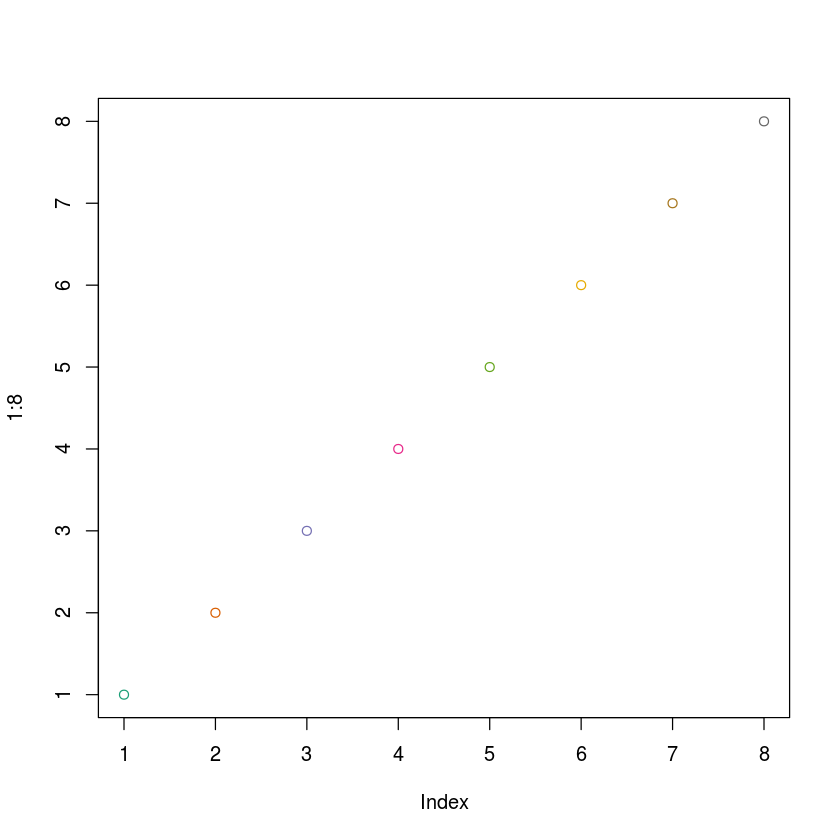

In [38]:
set.seed(375)
pal <- brewer.pal(8,"Dark2")
plot(1:8,col=pal)

##### Text Cloud

In [42]:
library(wordcloud)

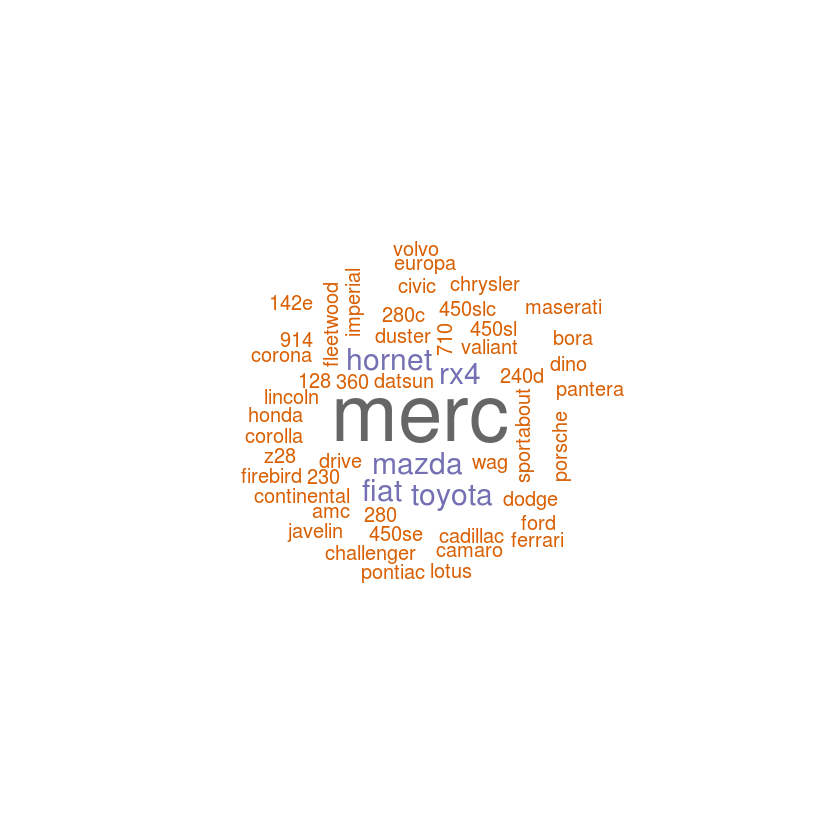

In [44]:
wordcloud(words = names(wordFreq),
         freq = wordFreq, min.freq=1, random.order=F,
         rot.per= 0.1, colors = pal)